In [89]:
# Simple Linear Regression Housing Price Predictions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [90]:
# Sample dataset
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}
df = pd.DataFrame(data)

In [91]:
df

,Area,Price
0,500,100000
1,700,130000
2,750,135000
3,900,170000
4,1100,200000
5,1200,210000
6,1400,240000
7,1600,260000
8,1800,300000
9,2100,320000


In [92]:
# Splitting data
X = df[['Area']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [93]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [94]:
# You can print the coefficients to understand the relationship
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('score:', regressor.score(X_train, y_train))

Coefficients: [137.59296822]
Intercept: 40358.350236646365
score: 0.9890557765146766


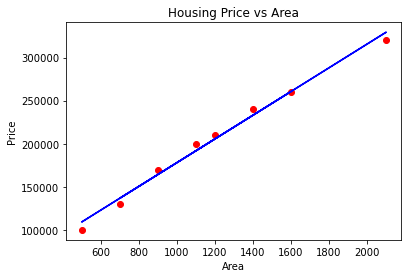

In [95]:
# Predicting
y_pred = regressor.predict(X_test)

# Visualization
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Housing Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


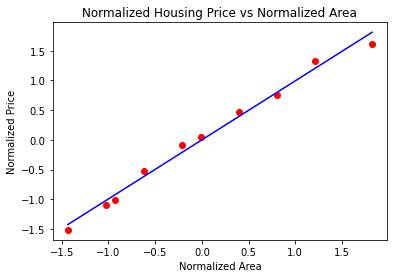

In [96]:
# Gradient descent for Simple Linear Regression

import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(data['Area']))
y_normalized = normalize(np.array(data['Price']))

# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Initialization
m = len(data['Area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# Gradient Descent
for _ in range(num_iterations):
    # Predictions
    y_pred = theta0 + theta1 * X
    
    # Derivatives
    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)
    
    # Update thetas
    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

# Visualization
plt.scatter(X, y_normalized, color='red')
plt.plot(X, theta0 + theta1 * X, color='blue')
plt.title('Normalized Housing Price vs Normalized Area')
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Price')
plt.show()


In [97]:
 theta0

-5.534461777756386e-17

In [98]:
theta1

0.9943396772194902

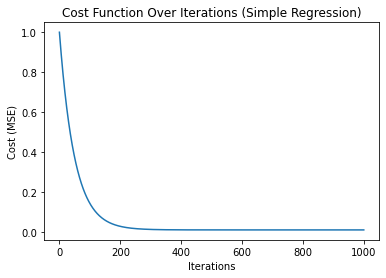

In [99]:
# Cost function for Simple linear Regression
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(data['Area']))
y_normalized = normalize(np.array(data['Price']))


# Hyperparameters
alpha = 0.01
num_iterations = 1000

# Initialization
m = len(data['Area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# Cost history to store MSE values for each iteration
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    cost_history.append(cost)
    
    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)
    
    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

plt.plot(cost_history)
plt.title('Cost Function Over Iterations (Simple Regression)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()


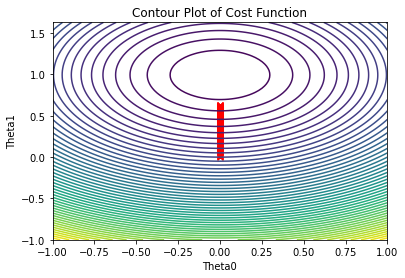

In [100]:
# Contour plot of Cost Function
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(data['Area']))
y_normalized = normalize(np.array(data['Price']))

# Hyperparameters
alpha = 0.01
num_iterations = 100

# Initialization
m = len(data['Area'])
theta0 = 0  # intercept
theta1 = 0  # slope

# To store the path taken by gradient descent
theta0_history = [theta0]
theta1_history = [theta1]
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    cost_history.append(cost)
    
    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)
    
    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

    theta0_history.append(theta0)
    theta1_history.append(theta1)

# Generate a grid of theta0 and theta1 values for the contour plot
theta0_vals = np.linspace(min(theta0_history) - 1, max(theta0_history) + 1, 100)
theta1_vals = np.linspace(min(theta1_history) - 1, max(theta1_history) + 1, 100)

# Calculate the cost function for each combination of theta0 and theta1
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X
        J_vals[i, j] = (1/m) * sum((y_pred - y_normalized)**2)

# Create the contour plot
plt.contour(theta0_vals, theta1_vals, J_vals.T, 50)
plt.scatter(theta0_history, theta1_history, c='red', marker='x')
plt.title('Contour Plot of Cost Function')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.show()


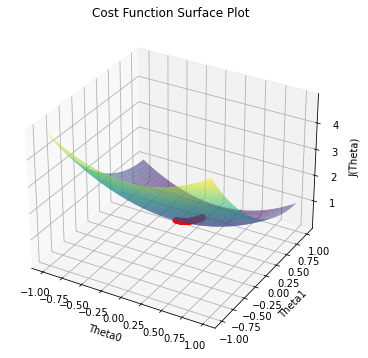

In [101]:
#3D Cost function surafce plot

import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)

# Normalize data
X = normalize(np.array(data['Area']))
y_normalized = normalize(np.array(data['Price']))

# Hyperparameters
alpha = 0.01
num_iterations = 100

# Initialization
m = len(data['Area'])
theta0 = 0  # intercept
theta1 = 0  # slope

theta0_history = []
theta1_history = []
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = theta0 + theta1 * X
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    
    dtheta0 = (1/m) * sum(y_pred - y_normalized)
    dtheta1 = (1/m) * sum((y_pred - y_normalized) * X)
    
    theta0 = theta0 - alpha * dtheta0
    theta1 = theta1 - alpha * dtheta1

    theta0_history.append(theta0)
    theta1_history.append(theta1)
    cost_history.append(cost)

# Grid of theta values
theta0_vals = np.linspace(-1, 1, 100)
theta1_vals = np.linspace(-1, 1, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_pred = t0 + t1 * X
        J_vals[i, j] = (1/m) * sum((y_pred - y_normalized)**2)

# 3D Surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals.T, cmap='viridis', alpha=0.6)

# Gradient descent path
ax.plot(theta0_history, theta1_history, cost_history, color='red', marker='o', markersize=5)

ax.set_title('Cost Function Surface Plot')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J(Theta)')
plt.show()


In [102]:
#Multiple linear Regression

# Sample dataset with an additional 'Bedrooms' column
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Bedrooms': [1, 2, 2, 2, 3, 3, 4, 4, 4, 5],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}
df = pd.DataFrame(data)



In [103]:
# Splitting data
X = df[['Area', 'Bedrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [105]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting
y_pred = regressor.predict(X_test)

# You can print the coefficients to understand the relationship
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('score:', regressor.score(X_train, y_train))


Coefficients: [  105.85365854 12756.09756098]
Intercept: 39780.487804878096
score: 0.9916051382343566


In [111]:
#Gradient descent calculation for Multiple Regression
# Sample dataset with additional 'Bedrooms' column
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Bedrooms': [1, 2, 2, 2, 3, 3, 4, 4, 4, 5],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)



# Hyperparameters
alpha = 0.01
num_iterations = 10000

# Initialization
m = len(data['Area'])
X0 = np.ones(m)
X1 = normalize(np.array(data['Area']))
X2 = normalize(np.array(data['Bedrooms']))
y = normalize(np.array(data['Price']))

X = np.array([X0, X1, X2]).T
theta = np.zeros(3)



# Gradient Descent
for _ in range(num_iterations):
    y_pred = np.dot(X, theta)
    gradient = (1/m) * np.dot(X.T, (y_pred - y))
    theta -= alpha * gradient

print("Parameters:", theta)



Parameters: [-2.62567745e-17  9.27442046e-01  6.80373123e-02]


In [114]:
X.T

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.43541658, -1.02820621, -0.92640361, -0.62099583, -0.21378545,
        -0.01018026,  0.39703012,  0.8042405 ,  1.21145088,  1.82226644],
       [-1.69030851, -0.84515425, -0.84515425, -0.84515425,  0.        ,
         0.        ,  0.84515425,  0.84515425,  0.84515425,  1.69030851]])

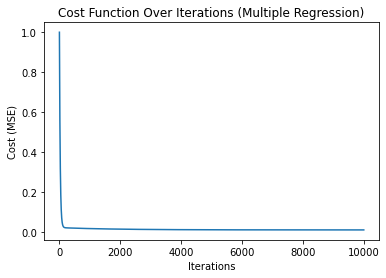

In [113]:
# Cost function for multiple linear Regression
# Sample dataset with additional 'Bedrooms' column
data = {
    'Area': [500, 700, 750, 900, 1100, 1200, 1400, 1600, 1800, 2100],
    'Bedrooms': [1, 2, 2, 2, 3, 3, 4, 4, 4, 5],
    'Price': [100000, 130000, 135000, 170000, 200000, 210000, 240000, 260000, 300000, 320000]
}

def normalize(feature):
    """Standardize the feature using Z-score normalization."""
    return (feature - np.mean(feature)) / np.std(feature)



# Hyperparameters
alpha = 0.01
num_iterations = 10000

# Initialization
m = len(data['Area'])
X0 = np.ones(m)
X1 = normalize(np.array(data['Area']))
X2 = normalize(np.array(data['Bedrooms']))
y = normalize(np.array(data['Price']))

X = np.array([X0, X1, X2]).T
theta = np.zeros(3)



# Cost history to store MSE values for each iteration
cost_history = []

# Gradient Descent
for _ in range(num_iterations):
    y_pred = np.dot(X, theta)
    cost = (1/m) * sum((y_pred - y_normalized)**2)
    cost_history.append(cost)
    
    gradient = (1/m) * np.dot(X.T, (y_pred - y_normalized))
    theta -= alpha * gradient

plt.plot(cost_history)
plt.title('Cost Function Over Iterations (Multiple Regression)')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.show()
